# RTS dispatch Example

This notebook is intended to demonstrate some of the basic capability enabled by SIIP::Power. Specifically, this notebook gives some examples of how SIIP::Power can be used to conduct *Unit Commitment* on the RTS system



## Packages

 - *[PowerSystems.jl](https://github.com/NREL/PowerSystems.jl)* We take advantage of Julia's dynamic types and functional dispatch in our implementation of PowerSystems to define data schemas for Power Systems Analysis problems.

 - *[PowerSimulations.jl](https://github.com/NREL/PowerSimulations.jl)* We leverage the schemas defined in PowerSystems to create functions for defining Power Systems Analysis Problems. 

## Dependencies
This notebook depends on the data loaded in the [Parsing_data_files.ipynb](Parsing_data_files.ipynb) executing the next two cells will run it as a script.

In [1]:
; jupyter nbconvert Parsing_data_files.ipynb --to script

[NbConvertApp] Converting notebook Parsing_data_files.ipynb to script
[NbConvertApp] Writing 1403 bytes to Parsing_data_files.jl


In [2]:
include("Parsing_data_files.jl")

Activating environment at `~/Documents/repos/Examples/env/Project.toml`
  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %    Status `~/Documents/repos/Examples/env/Project.toml`
  [9961bab8] Cbc v0.6.5
  [5ae59095] Colors v0.9.6
  [41994980] D3TypeTrees v0.1.1
  [a93c6f00] DataFrames v0.19.4
  [e2685f51] ECOS v0.10.0
  [60bf3e95] GLPK v0.12.0
  [b6b21f68] Ipopt v0.6.0
  [4076af6c] JuMP v0.20.0
  [51fcb6bd] NamedColors v0.2.0
  [f0f68f2c] PlotlyJS v0.13.0
  [91a5bcdd] Plots v0.27.0
  [e690365d] PowerSimulations v0.2.0 #master (https://github.com/NREL/PowerSimulations.jl.git)
  [bcd98974] PowerSystems v0.5.0
  [9e3dc215] TimeSeries v0.16.0
  [0f1e0344] WebIO v0.8.11


┌ Info: extending matpower format with data: areas 3x3
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/matpower.jl:290
┌ Info: extending matpower format with data: gen_name 158x4
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/matpower.jl:290
┌ Info: added zero cost function data for dclines
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/matpower.jl:530
┌ Info: extending matpower format by appending matrix "gen_name" in to "gen"
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/matpower.jl:625
┌ Info: the voltage setpoint on generator 32 does not match the value at bus 207
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/data.jl:1656
┌ Info: the voltage setpoint on generator 29 does not match the value at bus 202
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/dat

┌ Info: simplifying pwl cost on generator 78, [0.0, 0.0, 0.1666667, 0.0, 0.33333329999999994, 0.0, 0.5, 0.0] -> [0.0, 0.0, 0.5, 0.0]
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/data.jl:1805
┌ Info: simplifying pwl cost on generator 81, [0.0, 0.0, 0.1666667, 0.0, 0.33333329999999994, 0.0, 0.5, 0.0] -> [0.0, 0.0, 0.5, 0.0]
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/data.jl:1805
┌ Info: simplifying pwl cost on generator 101, [0.0, 0.0, 0.309, 0.0, 0.618, 0.0, 0.927, 0.0] -> [0.0, 0.0, 0.927, 0.0]
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/data.jl:1805
┌ Info: simplifying pwl cost on generator 105, [0.0, 0.0, 0.16566669999999997, 0.0, 0.3313333, 0.0, 0.49700000000000005, 0.0] -> [0.0, 0.0, 0.49700000000000005, 0.0]
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/data.jl:1805
┌ Info: simplifying pwl cost on generator 109, [0.0,

┌ Info: pwl x value 0.0033333 is outside the bounds 0.0-0.0 on generator 82
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/data.jl:1730
┌ Info: pwl x value 0.0066667 is outside the bounds 0.0-0.0 on generator 82
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/data.jl:1730
┌ Info: pwl x value 0.01 is outside the bounds 0.0-0.0 on generator 82
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/data.jl:1730
┌ Info: simplifying pwl cost on generator 82, [0.0, 0.0, 0.0033333, 0.0, 0.0066667, 0.0, 0.01, 0.0] -> [0.0, 0.0, 0.01, 0.0]
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/data.jl:1805
┌ Info: simplifying pwl cost on generator 79, [0.0, 0.0, 0.1666667, 0.0, 0.33333329999999994, 0.0, 0.5, 0.0] -> [0.0, 0.0, 0.5, 0.0]
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/data.jl:1805
┌ Info: simplifying pwl 

┌ Info: At line 490, unexpected section: expected: ZONE, comment specified: ZONE
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/pti.jl:578
┌ Info: At line 491, unexpected section: expected: INTER-AREA TRANSFER, comment specified: INTER-AREA TRANSFER
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/pti.jl:578
┌ Info: At line 493, unexpected section: expected: OWNER, comment specified: OWNER
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/pti.jl:578
┌ Info: At line 494, unexpected section: expected: FACTS CONTROL DEVICE, comment specified: FACTS CONTROL DEVICE
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/pti.jl:578
┌ Info: At line 498, unexpected section: expected: SWITCHED SHUNT, comment specified: SWITCHED SHUNT
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm_io/pti.jl:578
┌ Info: At line 499, unexp

┌ Warning: key 'reserve' not found in input data, set to nothing
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:53
┌ Warning: User-defined column name Voltage Limit Min is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Max is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Min is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Max is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Min is not in dataframe.
└ @ Po

┌ Warning: User-defined column name Voltage Limit Min is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Max is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Min is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Max is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Min is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Max is not in datafr

┌ Warning: User-defined column name Voltage Limit Min is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Max is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Min is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Max is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Min is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Voltage Limit Max is not in datafr

┌ Warning: User-defined column name From Active Power Min is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name From Active Power Max is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name To Active Power Min is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name To Active Power Max is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name DC Line Category is not in dataframe.
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/power_system_table_data.jl:867
┌ Warning: User-defined column name Variable Cost is not in

┌ Warning: no label mapping for
│   key = ("generator", "rating")
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/forecast_parser.jl:104
┌ Warning: no label mapping for
│   key = ("generator", "rating")
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/forecast_parser.jl:104
┌ Warning: no label mapping for
│   key = ("generator", "rating")
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/forecast_parser.jl:104
┌ Warning: no label mapping for
│   key = ("generator", "rating")
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/forecast_parser.jl:104
┌ Warning: no label mapping for
│   key = ("generator", "rating")
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/forecast_parser.jl:104
┌ Warning: no label mapping for
│   key = ("generator", "rating")
└ @ InfrastructureSystems /Users/cbarro

┌ Warning: no label mapping for
│   key = ("generator", "rating")
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/forecast_parser.jl:104
┌ Warning: no label mapping for
│   key = ("generator", "rating")
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/forecast_parser.jl:104
┌ Warning: no label mapping for
│   key = ("generator", "rating")
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/forecast_parser.jl:104
┌ Warning: no label mapping for
│   key = ("generator", "rating")
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/forecast_parser.jl:104
┌ Warning: no label mapping for
│   key = ("generator", "rating")
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/forecast_parser.jl:104
┌ Warning: no label mapping for
│   key = ("generator", "rating")
└ @ InfrastructureSystems /Users/cbarro

┌ Warning: rating is not a field of HydroDispatch; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("rating", 3600000 milliseconds, 2020-01-01T00:00:00, UUID("39fb5e38-e866-4386-89f0-54ea0df3f1f1"), 24, InfrastructureSystems.InfrastructureSystemsInternal(UUID("3907a14f-cb37-4981-b17a-d0497437b797")))
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/component.jl:8
┌ Warning: rating is not a field of HydroDispatch; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("rating", 3600000 milliseconds, 2020-01-01T00:00:00, UUID("f256c7a6-fe04-44fb-895c-579bb5ccb8d4"), 24, InfrastructureSystems.InfrastructureSystemsInternal(UUID("a7e19381-7158-414a-b90b-f8a13681da6a")))
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/component.jl:8
┌ Warning: rating is not a field of HydroDispatch; get_forecast_values will not work
│   forecast 

┌ Warning: rating is not a field of RenewableDispatch; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("rating", 3600000 milliseconds, 2020-01-01T00:00:00, UUID("4ce7a6a7-a545-4fc3-956d-0704303e1a05"), 24, InfrastructureSystems.InfrastructureSystemsInternal(UUID("541987d2-baa0-410a-bf70-8aba8a8096cd")))
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/component.jl:8
┌ Warning: rating is not a field of RenewableDispatch; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("rating", 3600000 milliseconds, 2020-01-01T00:00:00, UUID("297513cf-b272-4208-9844-94da5ab3709a"), 24, InfrastructureSystems.InfrastructureSystemsInternal(UUID("10856c6f-bdba-4ca4-bf49-3f0f78a6a5bd")))
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/component.jl:8
┌ Warning: rating is not a field of RenewableDispatch; get_forecast_values will not work
│

┌ Warning: rating is not a field of RenewableFix; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("rating", 3600000 milliseconds, 2020-01-01T00:00:00, UUID("5584e7d2-5ffc-49c9-8092-6ccb841116dd"), 24, InfrastructureSystems.InfrastructureSystemsInternal(UUID("b9924398-623b-4399-a255-00c3171b474f")))
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/component.jl:8
┌ Warning: rating is not a field of RenewableFix; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("rating", 3600000 milliseconds, 2020-01-01T00:00:00, UUID("9b7959ee-3629-4b82-b3fd-457aceab0cf7"), 24, InfrastructureSystems.InfrastructureSystemsInternal(UUID("79137a9b-99a3-4598-9c1d-01d8e92d63b3")))
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/component.jl:8
┌ Warning: rating is not a field of RenewableFix; get_forecast_values will not work
│   forecast = I

┌ Warning: rating is not a field of RenewableFix; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("rating", 3600000 milliseconds, 2020-01-01T00:00:00, UUID("14f9002b-b76b-4a71-8855-db6a0b09276b"), 24, InfrastructureSystems.InfrastructureSystemsInternal(UUID("efa7e2fc-cc0f-4746-963a-95b6d474a119")))
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/component.jl:8
┌ Warning: rating is not a field of RenewableFix; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("rating", 3600000 milliseconds, 2020-01-01T00:00:00, UUID("aa118485-de7d-486c-ba40-c5561b99744c"), 24, InfrastructureSystems.InfrastructureSystemsInternal(UUID("e15a8a6f-4ff6-43f8-8fe2-3dd0d92a363a")))
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/component.jl:8
┌ Warning: rating is not a field of RenewableFix; get_forecast_values will not work
│   forecast = I

┌ Warning: active_power_limits_min is not a field of HydroDispatch; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("active_power_limits_min", 3600000 milliseconds, 2020-01-01T00:00:00, UUID("6e8ec572-617b-4356-9cb7-940f52cb6c0e"), 24, InfrastructureSystems.InfrastructureSystemsInternal(UUID("b6a18853-d2f0-4705-9f0f-0bbd8dcfd85e")))
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/component.jl:8
┌ Warning: active_power_limits_min is not a field of RenewableFix; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("active_power_limits_min", 3600000 milliseconds, 2020-01-01T00:00:00, UUID("f542730f-9f72-4050-b4d3-8fbae975e8f0"), 24, InfrastructureSystems.InfrastructureSystemsInternal(UUID("b992a239-97d9-434f-bb4a-26df620f89ba")))
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/component.jl:8
┌ Warning: active_power_limits_

┌ Warning: active_power_limits_min is not a field of RenewableFix; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("active_power_limits_min", 3600000 milliseconds, 2020-01-01T00:00:00, UUID("7d1fc28f-04d7-4722-9d29-47b7d95eaa1c"), 24, InfrastructureSystems.InfrastructureSystemsInternal(UUID("53bad122-2701-4407-a13a-0860964b0372")))
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/component.jl:8
┌ Warning: active_power_limits_min is not a field of RenewableFix; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("active_power_limits_min", 3600000 milliseconds, 2020-01-01T00:00:00, UUID("0913050a-0a2e-451f-b6ac-845061131b39"), 24, InfrastructureSystems.InfrastructureSystemsInternal(UUID("46925b69-12b9-44d6-aeb3-3646bf12fd66")))
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/component.jl:8
┌ Warning: active_power_limits_m

┌ Info: Reading branch data
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm2ps_parser.jl:556
┌ Info: Reading DC Line data
└ @ PowerSystems /Users/cbarrows/.julia/packages/PowerSystems/Au2ke/src/parsers/pm2ps_parser.jl:527
┌ Warning: rating is not a field of RenewableDispatch; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("rating", 3600000 milliseconds, 2019-10-29T00:00:00, UUID("667e32b9-ad4f-424c-8b65-d978bad940f6"), 24, InfrastructureSystems.InfrastructureSystemsInternal(UUID("dbb32113-3a81-4cc0-a7f0-3cbaa934171f")))
└ @ InfrastructureSystems /Users/cbarrows/.julia/packages/InfrastructureSystems/VNmSU/src/component.jl:8
┌ Warning: rating is not a field of RenewableDispatch; get_forecast_values will not work
│   forecast = InfrastructureSystems.DeterministicInternal("rating", 3600000 milliseconds, 2019-10-29T00:00:00, UUID("6f177087-0366-4147-a2cb-d5ef985b6814"), 24, InfrastructureSystems.InfrastructureS

System
Base Power: 100.0

Components
Num components: 428

12×3 DataFrames.DataFrame. Omitted printing of 2 columns
│ Row │ ConcreteType      │
│     │ String            │
├─────┼───────────────────┤
│ 1   │ Bus               │
│ 2   │ GenericBattery    │
│ 3   │ HVDCLine          │
│ 4   │ HydroDispatch     │
│ 5   │ Line              │
│ 6   │ LoadZones         │
│ 7   │ PowerLoad         │
│ 8   │ RenewableDispatch │
│ 9   │ RenewableFix      │
│ 10  │ TapTransformer    │
│ 11  │ ThermalStandard   │
│ 12  │ Transformer2W     │

InfrastructureSystems.ForecastMetadata(3600000 milliseconds, 24)

In [3]:
# Modeling Packages
using PowerSimulations; # Power System Modeling
using JuMP;         # Optimization Modeling

using Cbc
Cbc_optimizer = JuMP.with_optimizer(Cbc.Optimizer, logLevel=1, ratioGap=0.1)


OptimizerFactory(Cbc.Optimizer, (), Base.Iterators.Pairs{Symbol,Real,Tuple{Symbol,Symbol},NamedTuple{(:logLevel, :ratioGap),Tuple{Int64,Float64}}}(:logLevel => 1,:ratioGap => 0.1))

In [4]:
const PSI = PowerSimulations;
const PSY = PowerSystems;

In [5]:
# Result Inspection Packages
using DataFrames;

# RTS-GMLC

In [6]:
sys

System
Base Power: 100.0

Components
Num components: 428

12×3 DataFrame. Omitted printing of 2 columns
│ Row │ ConcreteType      │
│     │ String            │
├─────┼───────────────────┤
│ 1   │ Bus               │
│ 2   │ GenericBattery    │
│ 3   │ HVDCLine          │
│ 4   │ HydroDispatch     │
│ 5   │ Line              │
│ 6   │ LoadZones         │
│ 7   │ PowerLoad         │
│ 8   │ RenewableDispatch │
│ 9   │ RenewableFix      │
│ 10  │ TapTransformer    │
│ 11  │ ThermalStandard   │
│ 12  │ Transformer2W     │

InfrastructureSystems.ForecastMetadata(3600000 milliseconds, 24)

## Define the model reference

In [7]:
## Model Ref
branches = Dict{Symbol, DeviceModel}(:L => DeviceModel(PSY.Line, PSI.StaticLine),
                                     :T => DeviceModel(PSY.Transformer2W, PSI.StaticTransformer),
                                     :TT => DeviceModel(PSY.TapTransformer, PSI.StaticTransformer),
                                     :dc_line => DeviceModel(PSY.HVDCLine, PSI.HVDCDispatch)
                                    )

services = Dict{Symbol, PSI.ServiceModel}()

devices = Dict{Symbol, DeviceModel}(:Generators => DeviceModel(PSY.ThermalStandard, PSI.ThermalBasicUnitCommitment),
                                    :Ren => DeviceModel(PSY.RenewableDispatch, PSI.RenewableFullDispatch),
                                    :Loads =>  DeviceModel(PSY.PowerLoad, PSI.StaticPowerLoad),
                                    #:ILoads =>  DeviceModel(PSY.InterruptibleLoad, PSI.StaticPowerLoad),
                                    )       


model_ref= ModelReference(CopperPlatePowerModel, devices, branches, services);

In [8]:
struct foo <: PSI.AbstractOperationModel end


## Build the problem

In [9]:
op_model = OperationModel(foo, model_ref, sys, optimizer = Cbc_optimizer)

┌ Info: Building ThermalStandard with ThermalBasicUnitCommitment formulation
└ @ PowerSimulations /Users/cbarrows/.julia/packages/PowerSimulations/b6VeR/src/core/build_operations.jl:14
┌ Info: Setting DeviceStatus initial conditions for the status of all devices ThermalStandard based on system data
└ @ PowerSimulations /Users/cbarrows/.julia/packages/PowerSimulations/b6VeR/src/routines/make_initial_conditions.jl:21
┌ Info: Setting DevicePower initial_condition of all devices ThermalStandard based on system data
└ @ PowerSimulations /Users/cbarrows/.julia/packages/PowerSimulations/b6VeR/src/routines/make_initial_conditions.jl:60
┌ Info: Setting TimeDurationON initial_condition of all devices ThermalStandard based on system data
└ @ PowerSimulations /Users/cbarrows/.julia/packages/PowerSimulations/b6VeR/src/routines/make_initial_conditions.jl:102
┌ Info: Setting TimeDurationOFF initial_condition of all devices ThermalStandard based on system data
└ @ PowerSimulations /Users/cbarrows/.jul


Operation Model

  transmission:  CopperPlatePowerModel
  devices: 
      Generators:
        device = ThermalStandard
        formulation = ThermalBasicUnitCommitment
      Ren:
        device = RenewableDispatch
        formulation = RenewableFullDispatch
      Loads:
        device = PowerLoad
        formulation = StaticPowerLoad
  branches: 
      T:
        device = Transformer2W
        formulation = StaticTransformer
      dc_line:
        device = HVDCLine
        formulation = HVDCDispatch
      TT:
        device = TapTransformer
        formulation = StaticTransformer
      L:
        device = Line
        formulation = StaticLine
  services:  Dict{Symbol,ServiceModel}()


## Solve the problem

In [10]:
res = solve_op_model!(op_model)

┌ Warning: MathOptInterface.VariablePrimalStart() is not supported by MathOptInterface.Bridges.LazyBridgeOptimizer{MathOptInterface.Utilities.CachingOptimizer{Cbc.Optimizer,MathOptInterface.Utilities.UniversalFallback{MathOptInterface.Utilities.Model{Float64}}}}. This 
│   information will be discarded. = information will be discarded.
└ @ MathOptInterface.Utilities /Users/cbarrows/.julia/packages/MathOptInterface/US9Wf/src/Utilities/copy.jl:140
┌ Warning: SolveTime() property not supported by COIN Branch-and-Cut (Cbc)
└ @ PowerSimulations /Users/cbarrows/.julia/packages/PowerSimulations/b6VeR/src/routines/get_results.jl:111


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Oct  7 2019 

command line - Cbc_C_Interface -ratioGap 0.1 -logLevel 1 -solve -quit (default strategy 1)
ratioGap was changed from 0 to 0.1
Continuous objective value is 1.29014e+06 - 0.19 seconds
Cgl0004I processed model has 8752 rows, 13522 columns (5314 integer (5314 of which binary)) and 27426 elements
Cbc0012I Integer solution of 1324005.3 found by DiveCoefficient after 0 iterations and 0 nodes (0.65 seconds)
Cbc0011I Exiting as integer gap of 33863.51 less than 1e-10 or 10%
Cbc0001I Search completed - best objective 1324005.322036715, took 0 iterations and 0 nodes (0.66 seconds)
Cbc0035I Maximum depth 0, 0 variables fixed on reduced cost
Cuts at root node changed objective from 1.29014e+06 to 1.29014e+06
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 secon


Results Model

P_ThermalStandard
24×77 DataFrame
│ Row │ Time                │ 322_CT_6 │ 321_CC_1 │ 202_STEAM_3 │ 315_STEAM_1 │ 223_CT_4 │ 123_STEAM_2 │ 213_CT_1 │ 223_CT_6 │ 313_CC_1 │ 202_CT_2 │ 101_STEAM_3 │ 302_CT_1 │ 123_CT_1 │ 113_CT_3 │ 302_CT_3 │ 215_CT_4 │ 102_STEAM_3 │ 301_CT_4 │ 202_CT_1 │ 113_CT_2 │ 221_CC_1 │ 223_CT_5 │ 315_CT_7 │ 215_CT_5 │ 114_SYNC_COND_1 │ 323_CC_1 │ 101_STEAM_4 │ 113_CT_1 │ 223_STEAM_3 │ 318_CC_1 │ 307_CT_2 │ 213_CT_2 │ 113_CT_4 │ 315_STEAM_3 │ 118_CC_1 │ 315_CT_8 │ 302_CT_2 │ 218_CC_1 │ 213_CC_3 │ 115_STEAM_3 │ 323_CC_2 │ 101_CT_1 │ 115_STEAM_2 │ 314_SYNC_COND_1 │ 101_CT_2 │ 322_CT_5 │ 214_SYNC_COND_1 │ 315_STEAM_5 │ 207_CT_2 │ 123_STEAM_3 │ 223_STEAM_1 │ 123_CT_5 │ 301_CT_1 │ 223_STEAM_2 │ 202_STEAM_4 │ 116_STEAM_1 │ 315_STEAM_4 │ 115_STEAM_1 │ 315_STEAM_2 │ 121_NUCLEAR_1 │ 102_CT_2 │ 123_CT_4 │ 207_CT_1 │ 301_CT_3 │ 316_STEAM_1 │ 102_CT_1 │ 216_STEAM_1 │ 315_CT_6 │ 201_CT_2 │ 201_STEAM_3 │ 201_CT_1 │ 301_CT_2 │ 302_CT_4 │ 307_CT_1 │ 102_STEAM_4 │ 

## Inspect results

In [34]:
res.variables[:ON_ThermalStandard]

,322_CT_6,321_CC_1,202_STEAM_3,315_STEAM_1,223_CT_4,123_STEAM_2,213_CT_1,223_CT_6
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Plotting results is a work in progress...

In [ ]:
using Plots
gr()

┌ Info: Recompiling stale cache file /Users/cbarrows/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Warning: Module DataStructures with build ID 129037609885193 is missing from the cache.
│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000


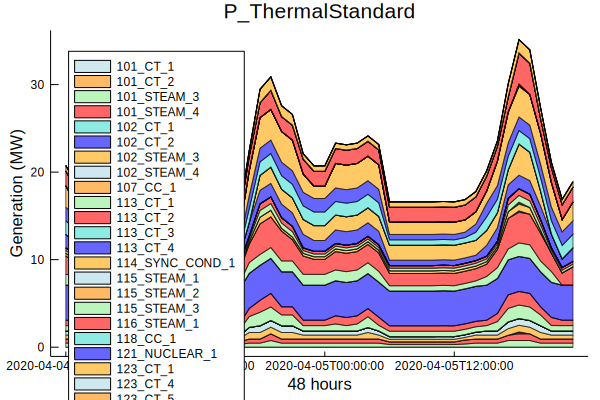

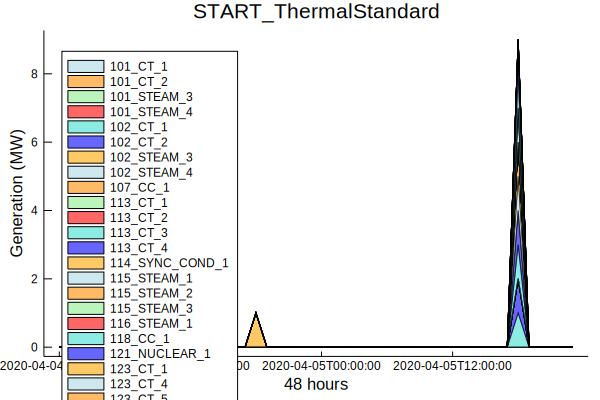

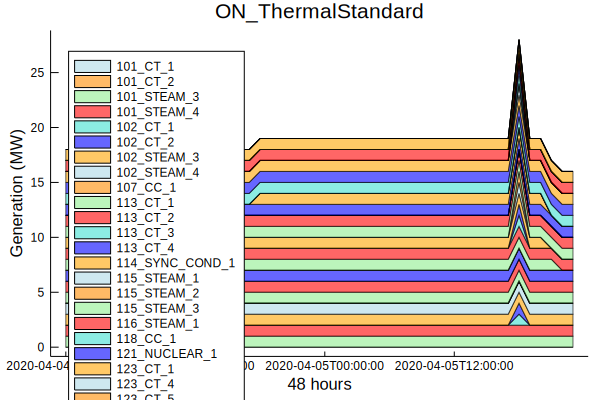

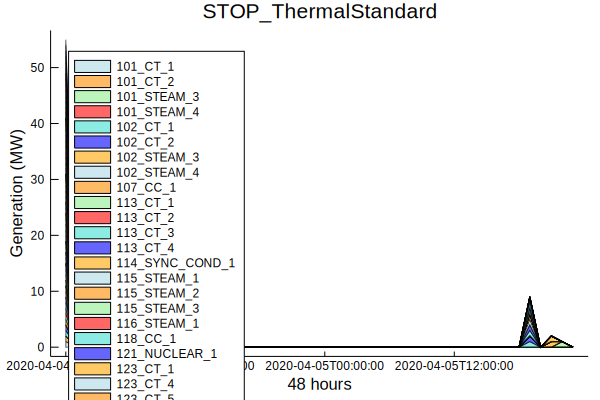

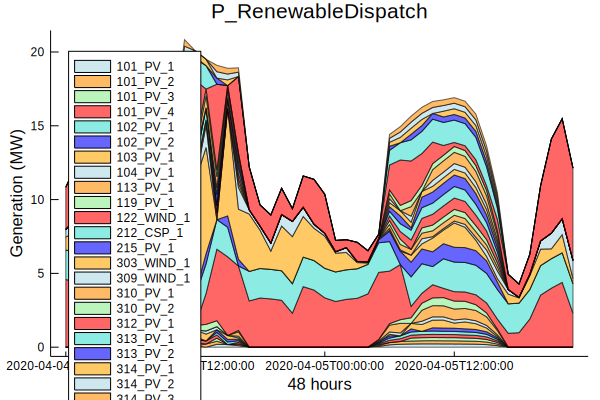

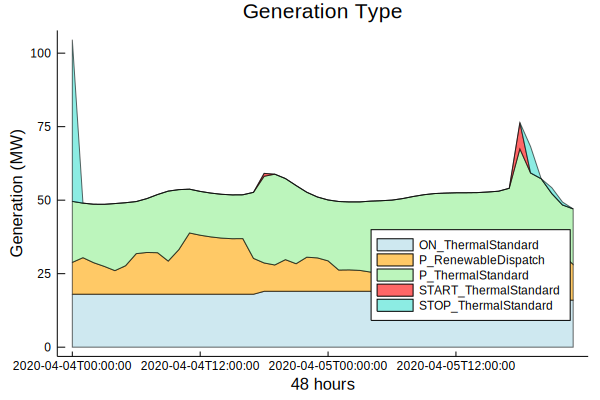

In [71]:
PSI.stack_plot(res)